<a href="https://colab.research.google.com/github/yuu19/machine-learning-100-/blob/master/machinelearning100_chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


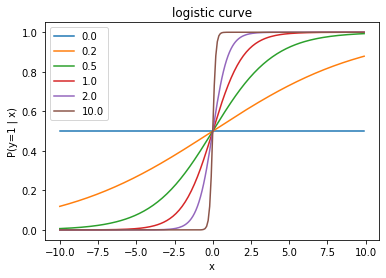

In [ ]:
def f(x):
  return np.exp(beta_0 + beta*x)/ (1+np.exp(beta_0+beta*x))

beta_0 = 0
beta_seq = np.array([0, 0.2, 0.5, 1, 2, 10])
x_seq = np.arange(-10, 10, 0.1)
plt.xlabel("x")
plt.ylabel("P(y=1 | x)")
plt.title("logistic curve")

for i in range(beta_seq.shape[0]):
  beta = beta_seq[i]
  p = f(x_seq)
  plt.plot(x_seq, p, label='{}'.format(beta))

plt.legend(loc='upper left')

#ロジスティック曲線の図示


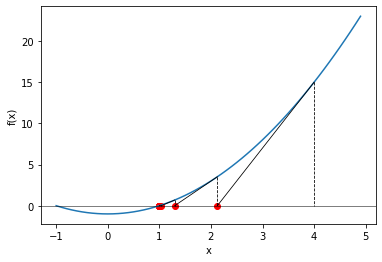

In [ ]:
#ニュートン法
def f(x):
  return x**2 - 1

def df(x):
  return 2*x

x_seq = np.arange(-1, 5, 0.1)
f_x = f(x_seq)
plt.plot(x_seq, f_x)
plt.axhline(y=0, c="black", linewidth=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
#初期値
x = 4
for i in range(10):
  X = x; Y = f(x) #X, Y: 更新前の点
  x = x - f(x)/df(x) #x: 更新後の点
  y = f(x) #y: 更新後の点
  plt.plot([X, x], [Y, 0], c="black", linewidth=0.8) #座標(X, Y)から(x, 0)への直線
  plt.plot([X, X], [Y, 0], c="black", linestyle="dashed", linewidth=0.8)
  plt.scatter(x, 0, c="red")


In [ ]:
#二変数の場合のニュートン法
def f(z):
  return z[0]**2 + z[1]**2 - 1
def dfx(z):
  return 2*z[0]
def dfy(z):
  return 2*z[1]
def g(z):
  return z[0] + z[1]
def dgx(z):
  return 1
def dgy(z):
  return 1

z = np.array([3, 4])
for i in range(10):
  J = np.array([[dfx(z), dfy(z)], [dgx(z), dgy(z)]])
  z = z - np.linalg.inv(J)@np.array([f(z), g(z)])
print(z)

[-0.70710678  0.70710678]


In [ ]:
N = 1000; p = 2
X = np.random.randn(N, 2)
X = np.insert(X, 0, 1, axis=1)
beta = np.random.randn(p+1)
y = []
prob = 1/(1+np.exp(X@beta)) #ロジスティック回帰においてP(Y=-1 | x)
print(prob.shape)
#目的変数の生成
for i in range(N):
  #P(Y=-1 | x)が一様乱数の値より小さい場合y=-1とする。
  if(np.random.rand(1)>prob[i]):
    y.append(1)
  else:
    y.append(-1)
beta

print(y)

(1000,)
[-1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -

In [ ]:
#最尤推定
beta = np.inf
#betaの初期値
gamma = np.random.randn(p+1)

while(np.sum((beta-gamma)) > 0.001): #終了条件を満たすまで繰り返し
  beta = gamma
  s = X@beta
  v = np.exp(-s*y)
  u = (y*v)/(1+v)
  w = v/((1+v)**2)
  W = np.diag(w)
  print(W)
  z = s + u/w
  gamma = np.linalg.inv(X.T@W@X)@X.T@W@z
print(gamma)

[[0.16592215 0.         0.         ... 0.         0.         0.        ]
 [0.         0.13373655 0.         ... 0.         0.         0.        ]
 [0.         0.         0.07589711 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14170558 0.         0.        ]
 [0.         0.         0.         ... 0.         0.05299324 0.        ]
 [0.         0.         0.         ... 0.         0.         0.22329694]]
[2.53654309 0.58578061 3.62772723]


In [ ]:
#データの生成
n = 100
x = np.concatenate([np.random.randn(n)+1, np.random.randn(n)-1], 0)
#print(x.size)
y = np.concatenate([np.ones(n), -np.ones(n)], 0)
print(y)
#訓練データの添え字
train = np.random.choice(2*n, int(n), replace=False) #n個を重複なしで抽出
#テストデータの添え字
test = list(set(range(2*n))- set(train))
Y = x[train]
X = np.insert(x[train].reshape(-1, 1), 0, 1, axis=1)


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]
(100,)
(100, 1)


In [ ]:
#gammaの初期値によっては収束しないので、複数回試行する
p = 1
beta = [0, 0]; gamma = np.random.randn(p+1)
#print(gamma)

while(np.sum((beta-gamma)**2)>0.001):
  beta = gamma
  s = X@beta
  v = np.exp(-s*Y)
  u = (Y*v)/(1+v)
  w = v/((1+v)**2)
  W = np.diag(w)
  z = s + u/w
  gamma = np.linalg.inv(X.T@W@X)@X.T@W@z
  #print(gamma.size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [ ]:
a = np.zeros([3, 3])
print(a)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
def table_count(m, u, v):
  n = u.shape[0]
  count = np.zeros((m, m))
  print(count)
  for i in range(n):
    count[int(u[i])][int(v[i])] += 1
  return count

ans = y[test] #正解
pred = np.sign(gamma[0]+x[test]*gamma[1])

#{-1, 1}から{0, 1}に直す
ans = (ans+1)/2
pred = (pred+1)/2
table_count(3, ans, pred)


NameError: ignored

In [ ]:
#K近傍法
def knn_1 (x, y, z, k):
  x = np.array(x); y = np.array(y)
  dis = []
  for i in range(x.shape[0]):
    dis.append(np.linalg.norm(z-x[i,]))
  S = np.argsort(dis)[0:k] #距離が近いk個のindex
  u = np.bincount(y[S])
  m = [i for i, x in enumerate(u) if x == max(u)] #最頻値のindex
  #タイブレーキングの処理
  while(len(m)>1):
    k = k-1
    S = S[0:k]
    u = np.bincount(y[S])
    m = [i for i, x in enumerate(u) if x == max(u)]
  return m[0]

In [ ]:
#一般化
def knn(x, y, z, k):
  w = []
  for i in range(z.shape[0]):
    w.append(knn_1(x, y, z[i,], k))
    

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target
n = x.shape[0]
#データを訓練データとテストデータに分割する
#訓練データのインデックス
train = np.random.choice(n, int(n/2), replace=False)
#テストデータのインデックス
test = list(set(range(n))-set(train))
w = knn(x[train,], y[train], x[test, ], k=3)
table_count(3, y[test], w)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


TypeError: ignored